In [1]:
import utide

print(utide.__version__)

0.3.0


In [2]:
import numpy as np


def fake_tide(t, M2amp, M2phase):
    """
    Generate a minimally realistic-looking fake semidiurnal tide.
    
    t is time in hours
    phases are in radians
    
    Modified from: http://currents.soest.hawaii.edu/ocn760_4/_static/plotting.html
    """
    return M2amp * np.sin(2 * np.pi * t / 12.42 - M2phase)

In [3]:
from pandas import date_range

N = 500

t = date_range(start="2016-03-29", periods=N, freq="h")

# Signal + some noise.
u = fake_tide(np.arange(N), M2amp=2, M2phase=0) + np.random.randn(N)
v = fake_tide(np.arange(N), M2amp=1, M2phase=np.pi) + np.random.randn(N)

In [4]:
from utide import solve


coef = solve(
    t, u, v,
    lat=-42.5,
    constit=['M2'],
    nodal=False,
    trend=False,
    method='ols',
    conf_int='linear',
    Rayleigh_min=0.95,
)

solve: matrix prep ... solution ... done.


In [5]:
coef

{'name': array(['M2'], dtype=object),
 'aux': {'frq': array([0.0805114]),
  'lind': array([47]),
  'reftime': 736062.3958333333,
  'opt': {'twodim': True,
   'equi': True,
   'conf_int': True,
   'cnstit': ['M2'],
   'notrend': True,
   'prefilt': [],
   'nodsatlint': 0,
   'nodsatnone': True,
   'gwchlint': False,
   'gwchnone': False,
   'infer': None,
   'inferaprx': 0,
   'rmin': 0.95,
   'method': 'ols',
   'tunrdn': 1,
   'linci': True,
   'white': False,
   'nrlzn': 200,
   'lsfrqosmp': 1,
   'nodiagn': 0,
   'diagnplots': 0,
   'diagnminsnr': 2,
   'ordercnstit': 'PE',
   'runtimedisp': 'yyy',
   'nodesatlint': False,
   'nodesatnone': False,
   'newopts': {'constit': ['M2'],
    'order_constit': 'PE',
    'conf_int': 'linear',
    'method': 'ols',
    'trend': False,
    'phase': 'Greenwich',
    'nodal': False,
    'infer': None,
    'MC_n': 200,
    'Rayleigh_min': 0.95,
    'robust_kw': {'weight_function': 'cauchy'},
    'white': False,
    'verbose': True,
    'epoch': Non

In [6]:
from utide import reconstruct

tide = reconstruct(t, coef)

prep/calcs ... done.


In [7]:
tide.keys()

dict_keys(['t_in', 'epoch', 'constit', 'min_SNR', 'min_PE', 't_mpl', 'u', 'v'])

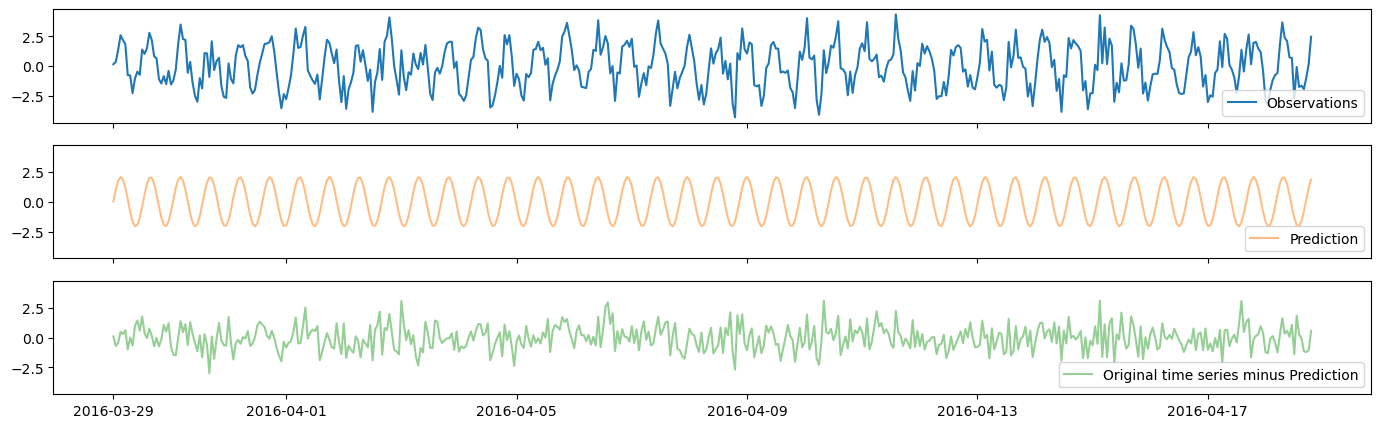

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(t, u, label='Observations', color='C0')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(t, tide['u'], alpha=0.5, label='Prediction', color='C1')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(t, u-tide['u'], alpha=0.5, label='Original time series minus Prediction', color='C2')
ax2.legend(numpoints=1, loc='lower right');

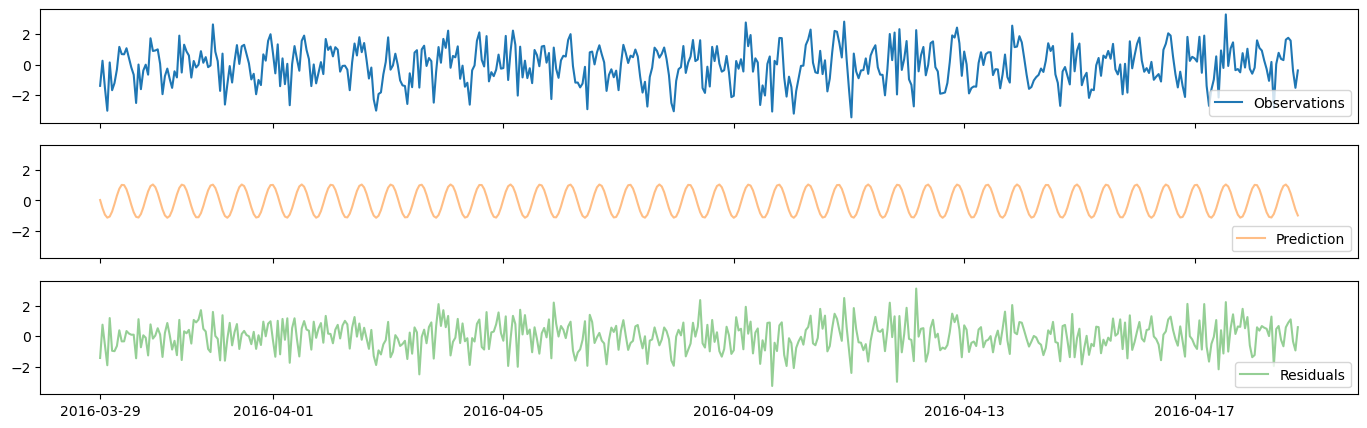

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(t, v, label='Observations', color='C0')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(t, tide['v'], alpha=0.5, label='Prediction', color='C1')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(t, v-tide['v'], alpha=0.5, label='Residuals', color='C2')
ax2.legend(numpoints=1, loc='lower right');